In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

cns_path = "/teradata/sbdubey/deepcell-experiments-data/intestine-codex-stanford/output-data"
caltech_path = os.path.expanduser("~/dataset_hiskers/processed_ross")

In [2]:
def get_available_hubmap_ids():
    cns_ids = set()
    if os.path.exists(cns_path):
        cns_ids = set([d for d in os.listdir(cns_path) if os.path.isdir(os.path.join(cns_path, d))])
    
    caltech_ids = set()
    if os.path.exists(caltech_path):
        caltech_files = [f for f in os.listdir(caltech_path) if f.endswith('_deepcell_population.csv')]
        caltech_ids = set([f.replace('_deepcell_population.csv', '') for f in caltech_files])
    
    common_ids = cns_ids.intersection(caltech_ids)
    return sorted(list(common_ids)), cns_ids, caltech_ids

common_ids, cns_ids, caltech_ids = get_available_hubmap_ids()
print(f"Common HubMap IDs: {len(common_ids)}")
print(f"CNS only IDs: {len(cns_ids - set(common_ids))}")
print(f"Caltech only IDs: {len(caltech_ids - set(common_ids))}")
print(f"\nCommon IDs: {common_ids}")

Common HubMap IDs: 63
CNS only IDs: 0
Caltech only IDs: 276

Common IDs: ['HBM233GTZN466', 'HBM244TVNH734', 'HBM245NHMB685', 'HBM253MXKW373', 'HBM292FCMS497', 'HBM293LGZW236', 'HBM334RPTP997', 'HBM352MDZF598', 'HBM396FNQW543', 'HBM398SWKV256', 'HBM423MMGW744', 'HBM423QJJR545', 'HBM429DWKZ323', 'HBM433ZLWP627', 'HBM443XPDK549', 'HBM475DXDC532', 'HBM494VNTQ422', 'HBM523XHWW384', 'HBM524VWGB378', 'HBM538PGFT538', 'HBM564DSPG945', 'HBM578XJZQ389', 'HBM587VTDD789', 'HBM599BFHP494', 'HBM625BPDM987', 'HBM629DBKM347', 'HBM634MSKL575', 'HBM636GTZK259', 'HBM644QKZS857', 'HBM654MLRM725', 'HBM657JVPV825', 'HBM658HHLH689', 'HBM658WGPT978', 'HBM676VBCN445', 'HBM685PCCJ427', 'HBM725QFKT594', 'HBM735PSTF274', 'HBM749PPQP849', 'HBM753VDXD934', 'HBM754SFBF894', 'HBM776FNRJ959', 'HBM776SDCW837', 'HBM777TLQL487', 'HBM784TKZX992', 'HBM795GWKV825', 'HBM829QZQP626', 'HBM837RHNC533', 'HBM842LQDP877', 'HBM886NTZN682', 'HBM889KDGM632', 'HBM929PRKH522', 'HBM937XPRG696', 'HBM942WHFC488', 'HBM946GRVG379', 'HBM946N

In [3]:
def load_cns_data(hubmap_id):
    csv_path = os.path.join(cns_path, hubmap_id, f"{hubmap_id}_deepcell_population.csv")
    return pd.read_csv(csv_path)

def load_caltech_data(hubmap_id):
    csv_path = os.path.join(caltech_path, f"{hubmap_id}_deepcell_population.csv")
    return pd.read_csv(csv_path)

In [8]:
# Process all 63 common IDs
hubmap_ids_to_compare = common_ids

print(f"Analyzing all {len(hubmap_ids_to_compare)} HubMap IDs")
print(f"Results will be saved to: {os.path.join(cns_path, 'intestine_result')}")

Analyzing all 63 HubMap IDs
Results will be saved to: /teradata/sbdubey/deepcell-experiments-data/intestine-codex-stanford/output-data/intestine_result



Analysis for HBM233GTZN466


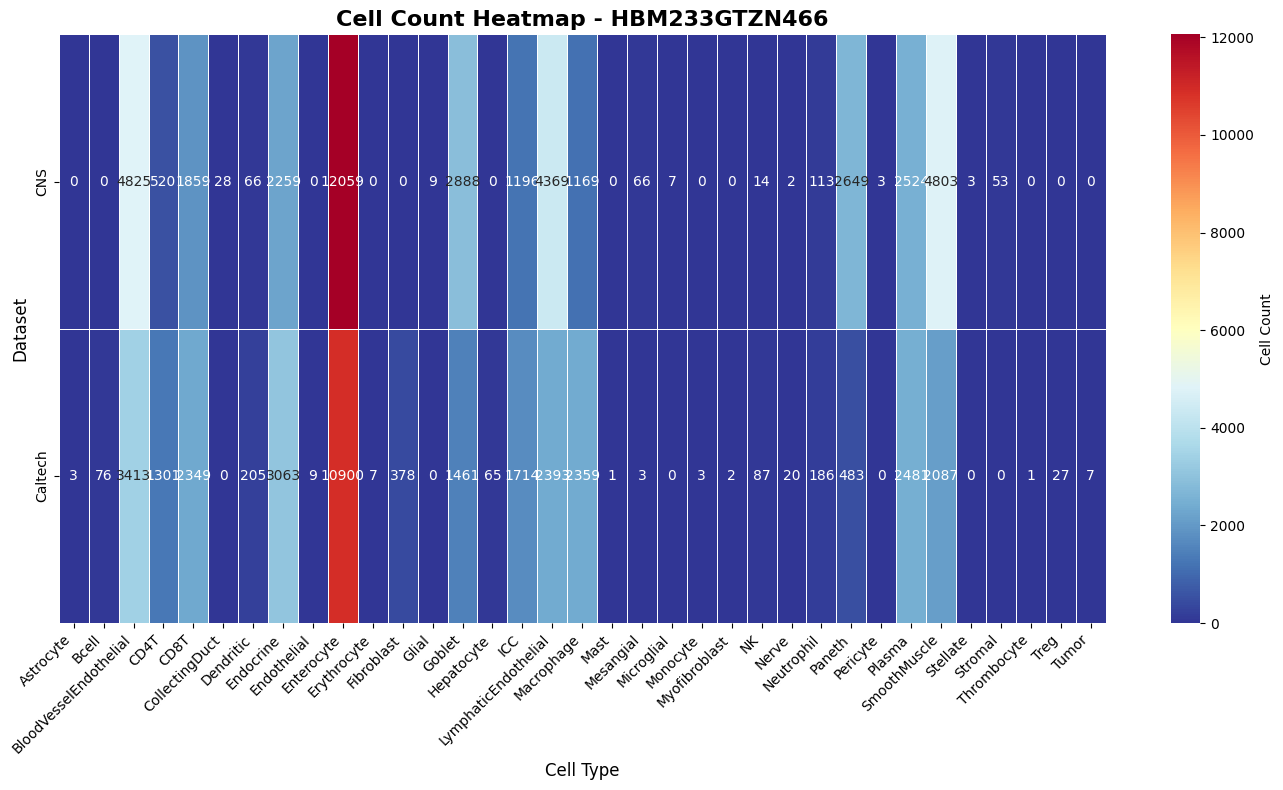


Analysis for HBM244TVNH734


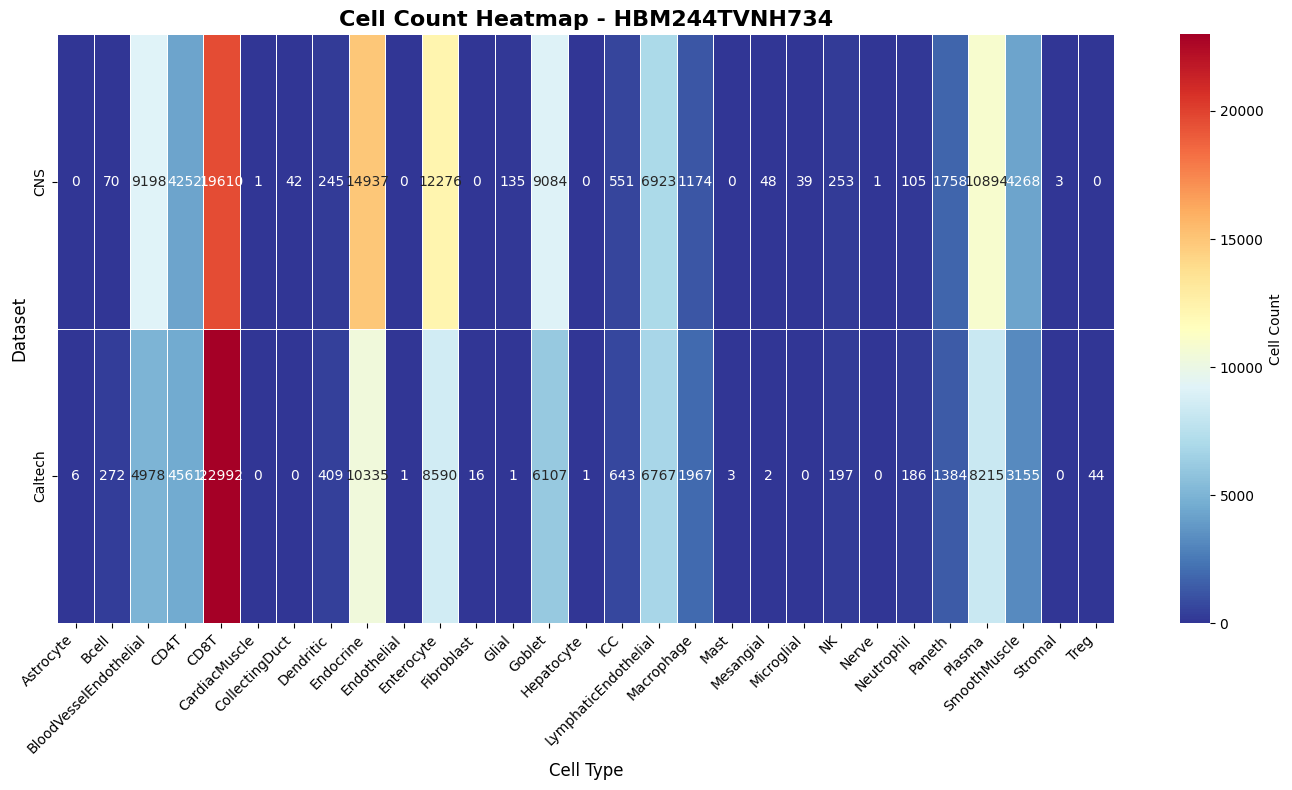


Analysis for HBM245NHMB685


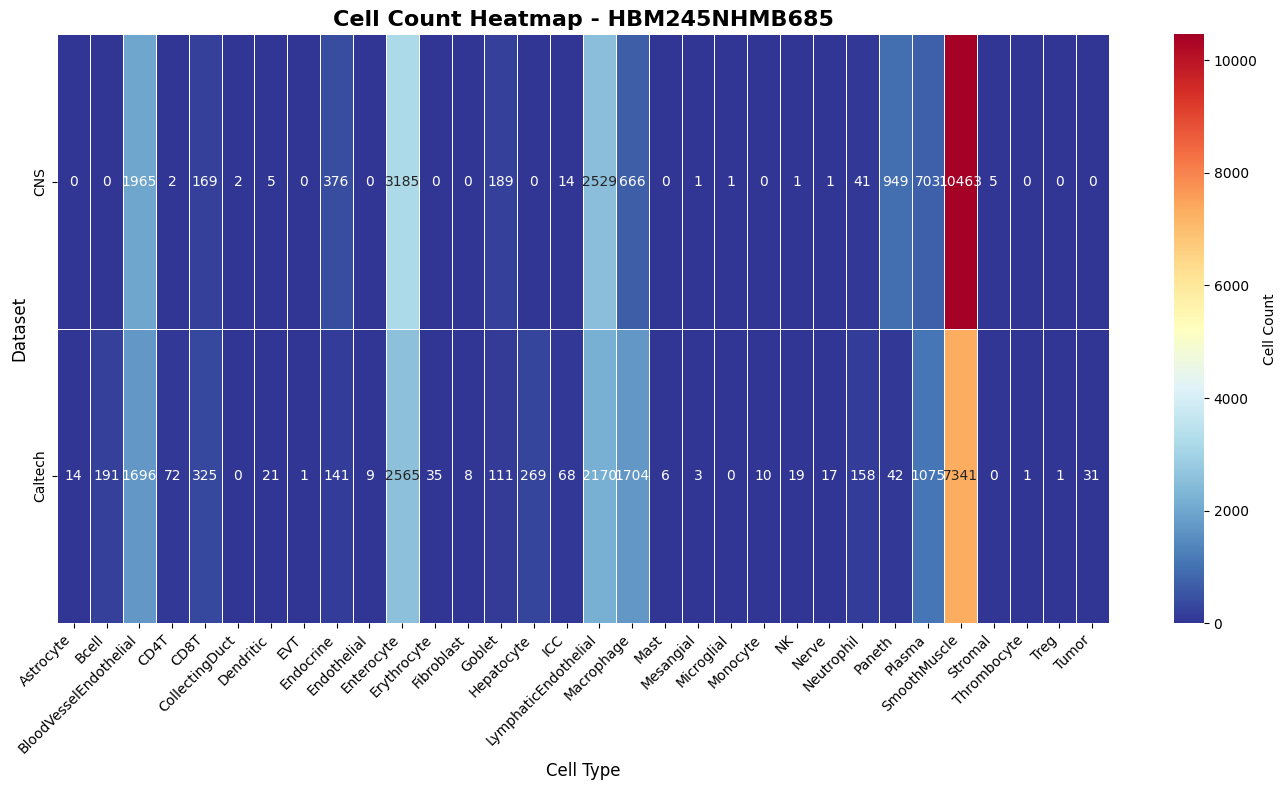

In [28]:
for hubmap_id in hubmap_ids_to_compare:
    try:
        cns_df = load_cns_data(hubmap_id)
        caltech_df = load_caltech_data(hubmap_id)
        
        all_cell_types = list(set(cns_df['Cell_type'].tolist() + caltech_df['Cell_type'].tolist()))
        all_cell_types.sort()
        
        comparison_data = []
        for cell_type in all_cell_types:
            cns_count = cns_df[cns_df['Cell_type'] == cell_type]['Cell_Count'].values
            cns_count = cns_count[0] if len(cns_count) > 0 else 0
            
            caltech_count = caltech_df[caltech_df['Cell_type'] == cell_type]['Cell_Count'].values
            caltech_count = caltech_count[0] if len(caltech_count) > 0 else 0
            
            comparison_data.append([cns_count, caltech_count])
        
        comparison_df = pd.DataFrame(comparison_data, columns=['CNS', 'Caltech'], index=all_cell_types)
        
        print(f"\n{'='*60}")
        print(f"Analysis for {hubmap_id}")
        print(f"{'='*60}")
        
        plt.figure(figsize=(14, 8))
        
        mask = (comparison_df['CNS'] == 0) & (comparison_df['Caltech'] == 0)
        plot_df = comparison_df[~mask]
        
        sns.heatmap(plot_df.T, annot=True, fmt='g', cmap='RdYlBu_r', 
                    cbar_kws={'label': 'Cell Count'}, linewidths=0.5)
        plt.title(f'Cell Count Heatmap - {hubmap_id}', fontsize=16, fontweight='bold')
        plt.xlabel('Cell Type', fontsize=12)
        plt.ylabel('Dataset', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error processing {hubmap_id}: {str(e)}")

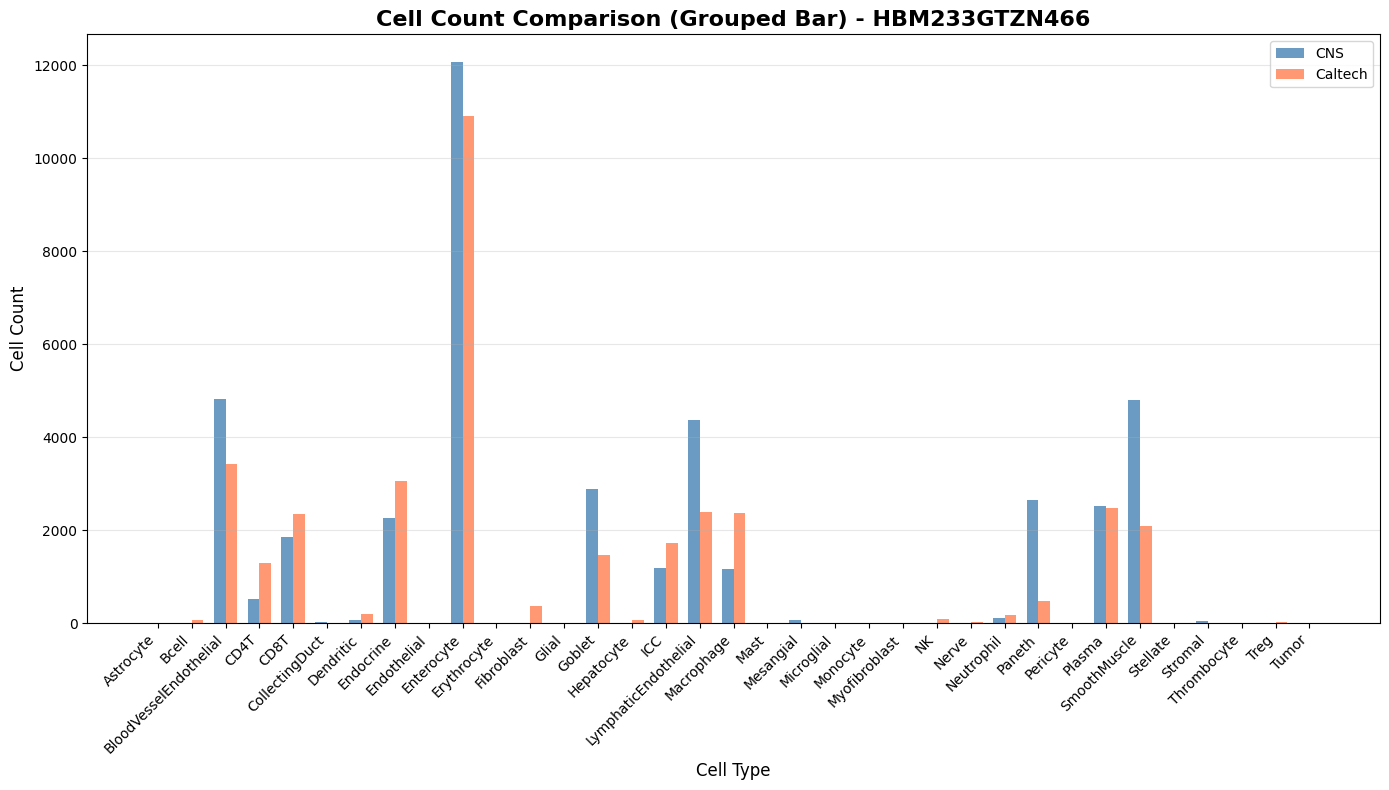

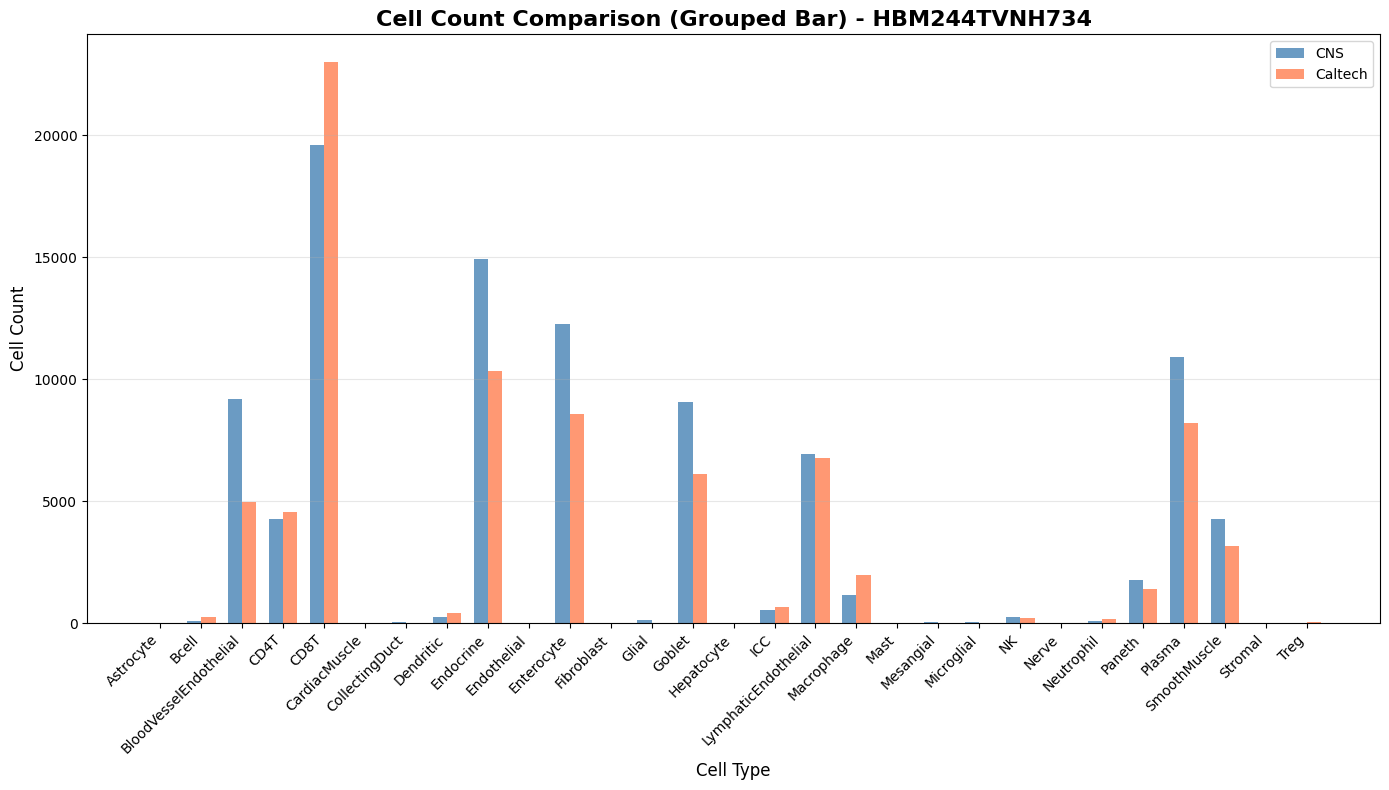

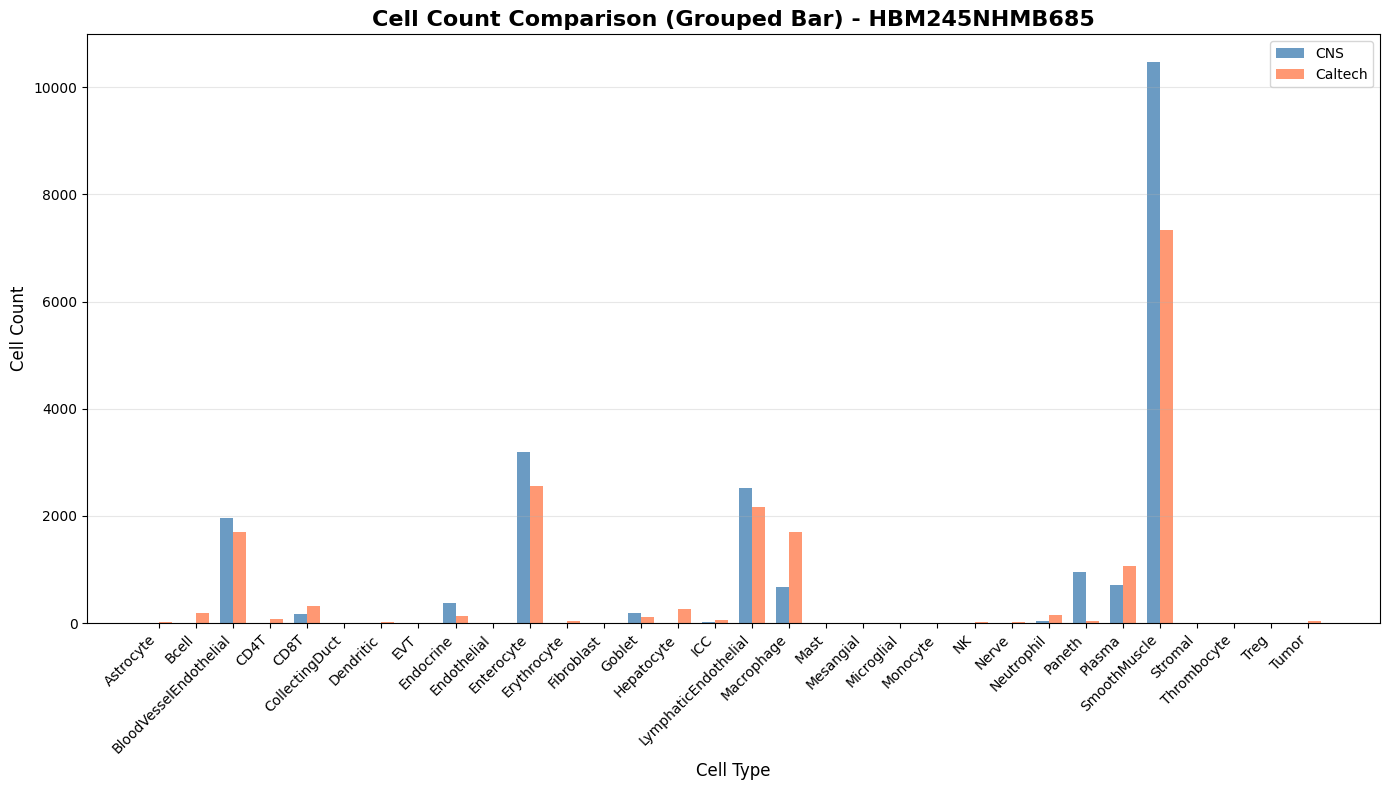

In [29]:
for hubmap_id in hubmap_ids_to_compare:
    try:
        cns_df = load_cns_data(hubmap_id)
        caltech_df = load_caltech_data(hubmap_id)
        
        fig, ax = plt.subplots(figsize=(14, 8))
        
        cell_types = list(set(cns_df['Cell_type'].tolist() + caltech_df['Cell_type'].tolist()))
        cell_types.sort()
        
        cns_counts = []
        caltech_counts = []
        
        for cell_type in cell_types:
            cns_count = cns_df[cns_df['Cell_type'] == cell_type]['Cell_Count'].values
            cns_counts.append(cns_count[0] if len(cns_count) > 0 else 0)
            
            caltech_count = caltech_df[caltech_df['Cell_type'] == cell_type]['Cell_Count'].values
            caltech_counts.append(caltech_count[0] if len(caltech_count) > 0 else 0)
        
        x = np.arange(len(cell_types))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, cns_counts, width, label='CNS', color='steelblue', alpha=0.8)
        bars2 = ax.bar(x + width/2, caltech_counts, width, label='Caltech', color='coral', alpha=0.8)
        
        ax.set_xlabel('Cell Type', fontsize=12)
        ax.set_ylabel('Cell Count', fontsize=12)
        ax.set_title(f'Cell Count Comparison (Grouped Bar) - {hubmap_id}', fontsize=16, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(cell_types, rotation=45, ha='right')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error processing {hubmap_id}: {str(e)}")

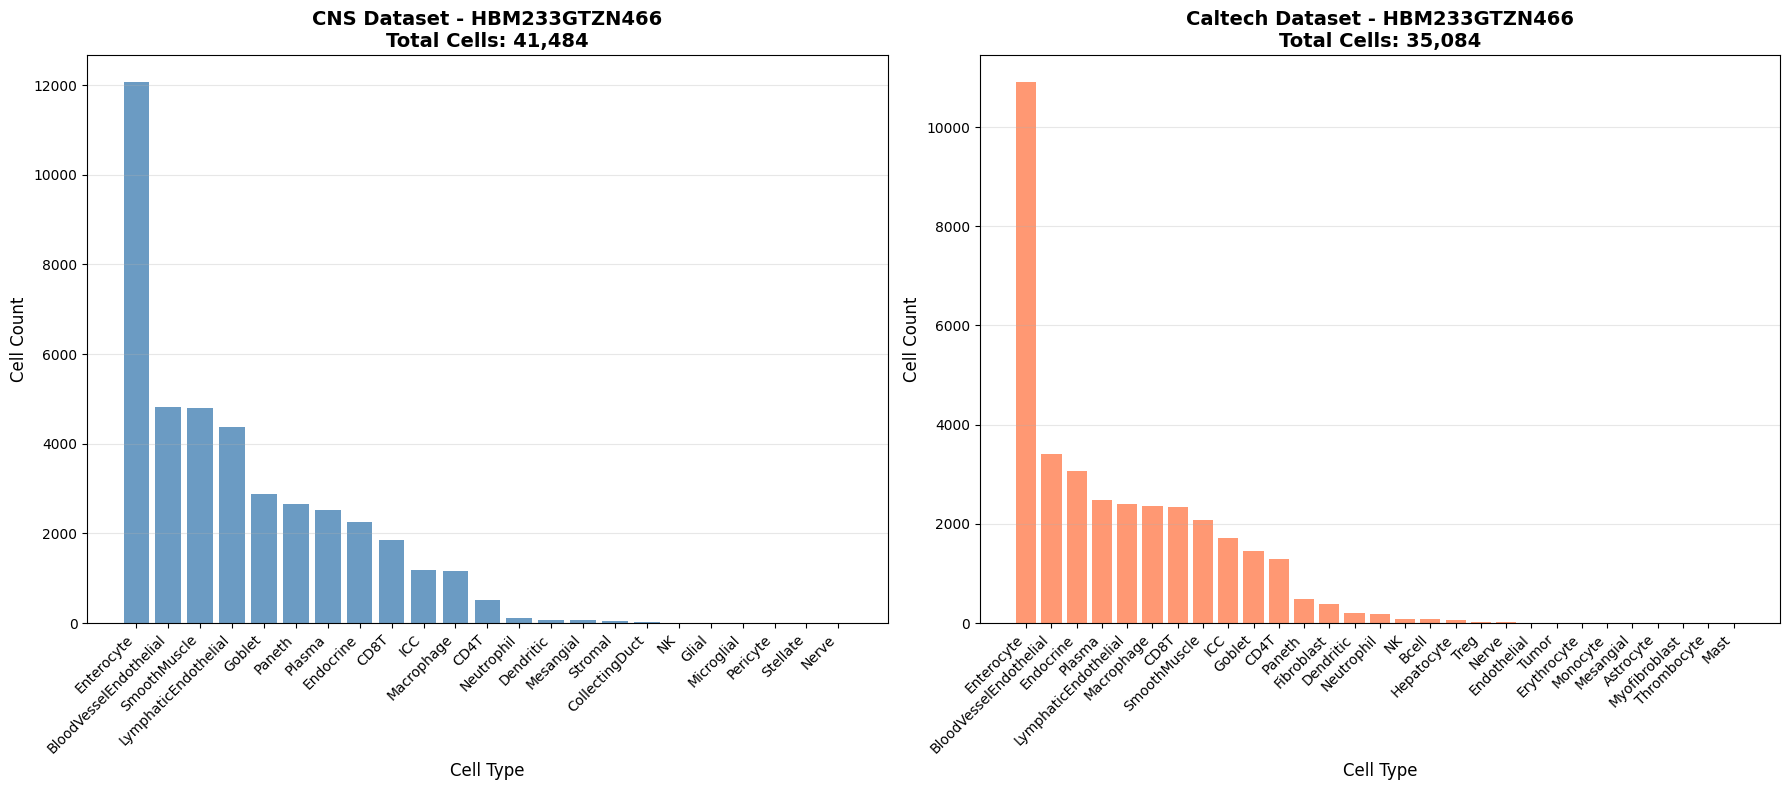

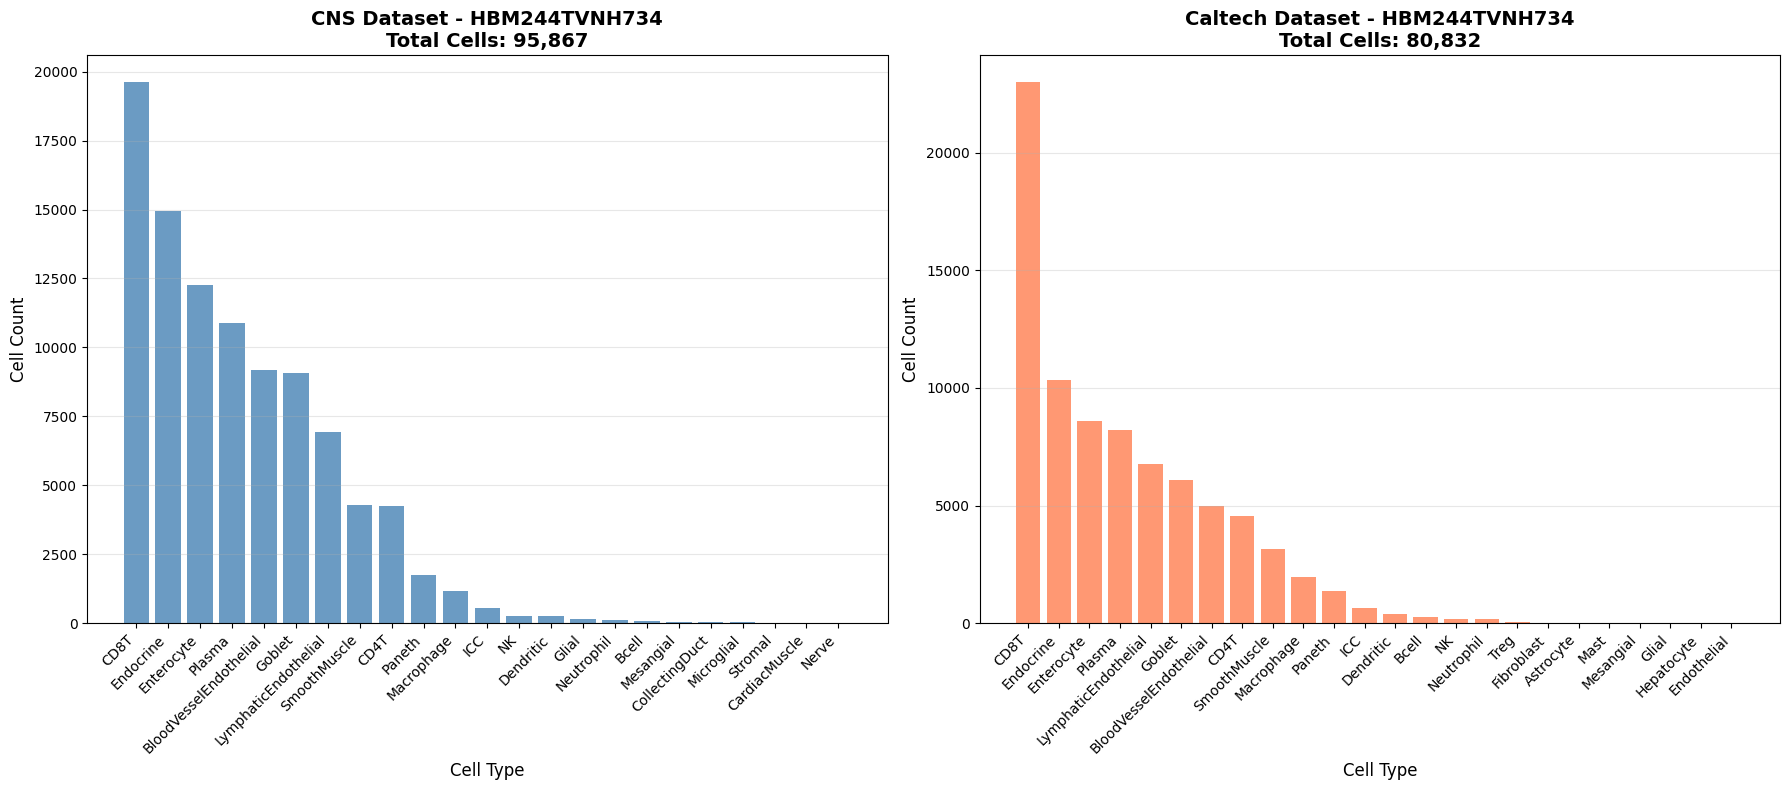

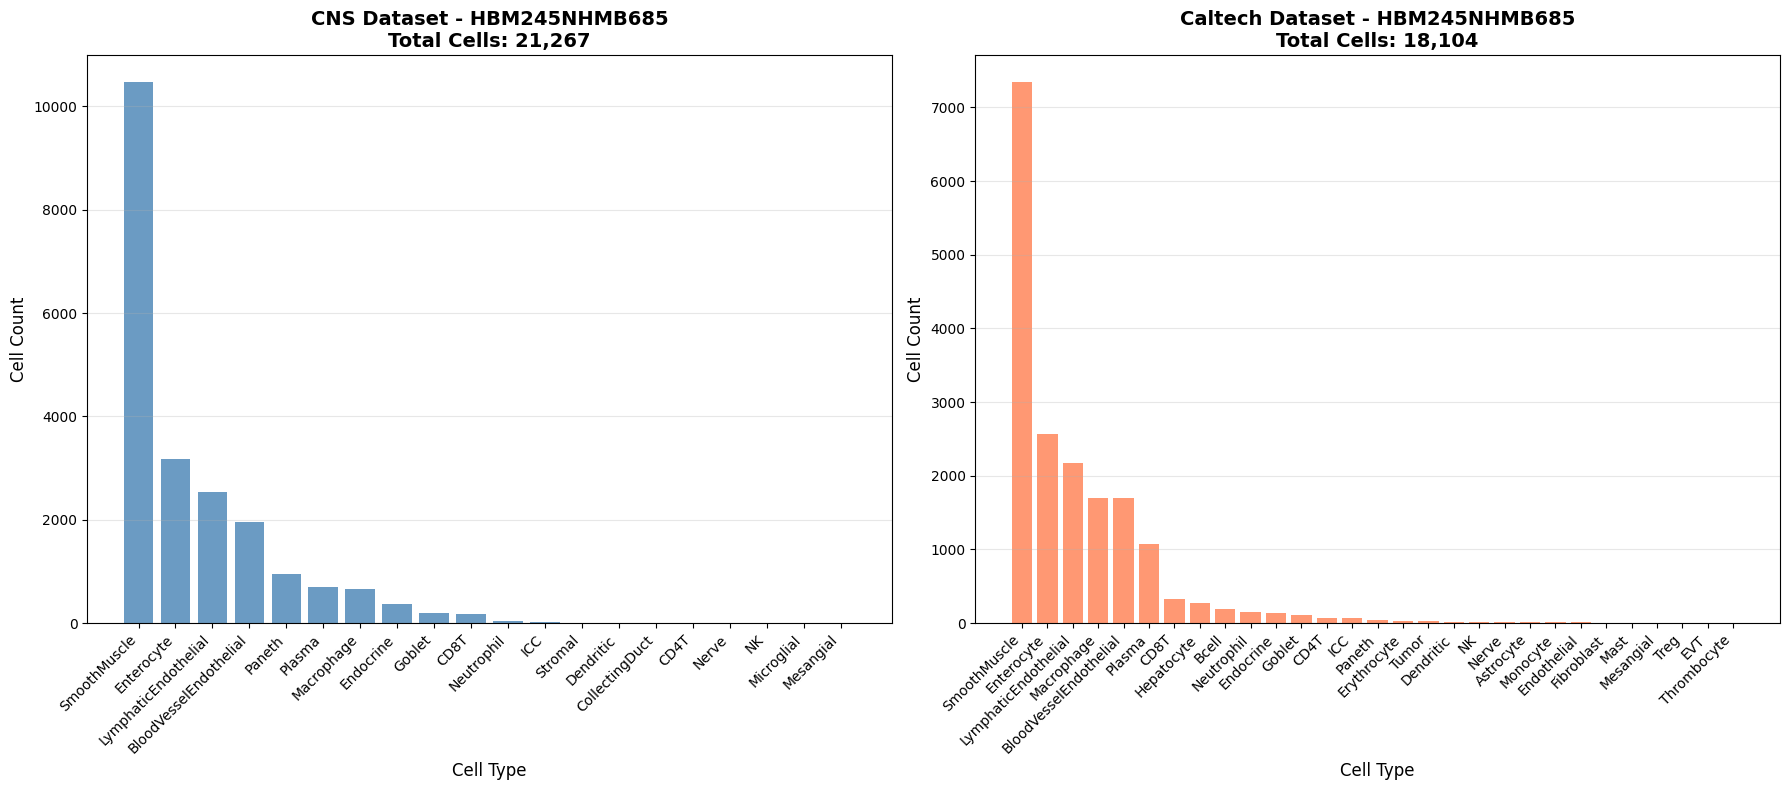

In [30]:
for hubmap_id in hubmap_ids_to_compare:
    try:
        cns_df = load_cns_data(hubmap_id)
        caltech_df = load_caltech_data(hubmap_id)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
        
        cns_total = cns_df['Cell_Count'].sum()
        cns_df_sorted = cns_df.sort_values('Cell_Count', ascending=False)
        
        ax1.bar(range(len(cns_df_sorted)), cns_df_sorted['Cell_Count'], color='steelblue', alpha=0.8)
        ax1.set_xlabel('Cell Type', fontsize=12)
        ax1.set_ylabel('Cell Count', fontsize=12)
        ax1.set_title(f'CNS Dataset - {hubmap_id}\nTotal Cells: {cns_total:,}', fontsize=14, fontweight='bold')
        ax1.set_xticks(range(len(cns_df_sorted)))
        ax1.set_xticklabels(cns_df_sorted['Cell_type'], rotation=45, ha='right')
        ax1.grid(axis='y', alpha=0.3)
        
        caltech_total = caltech_df['Cell_Count'].sum()
        caltech_df_sorted = caltech_df.sort_values('Cell_Count', ascending=False)
        
        ax2.bar(range(len(caltech_df_sorted)), caltech_df_sorted['Cell_Count'], color='coral', alpha=0.8)
        ax2.set_xlabel('Cell Type', fontsize=12)
        ax2.set_ylabel('Cell Count', fontsize=12)
        ax2.set_title(f'Caltech Dataset - {hubmap_id}\nTotal Cells: {caltech_total:,}', fontsize=14, fontweight='bold')
        ax2.set_xticks(range(len(caltech_df_sorted)))
        ax2.set_xticklabels(caltech_df_sorted['Cell_type'], rotation=45, ha='right')
        ax2.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error processing {hubmap_id}: {str(e)}")

In [ ]:
# Generate and save normalized confusion matrix for all HubMap IDs
output_folder = os.path.join(cns_path, 'intestine_result')
os.makedirs(output_folder, exist_ok=True)

print(f"Processing {len(hubmap_ids_to_compare)} HubMap IDs...")
print(f"Saving results to: {output_folder}\n")

successful = 0
failed = 0

for idx, hubmap_id in enumerate(hubmap_ids_to_compare, 1):
    try:
        cns_df = load_cns_data(hubmap_id)
        caltech_df = load_caltech_data(hubmap_id)
        
        # Get all cell types from both datasets
        all_cell_types = sorted(list(set(cns_df['Cell_type'].tolist() + caltech_df['Cell_type'].tolist())))
        
        # Create comparison matrix
        comparison_matrix = np.zeros((len(all_cell_types), len(all_cell_types)))
        
        for i, cns_cell_type in enumerate(all_cell_types):
            cns_count = cns_df[cns_df['Cell_type'] == cns_cell_type]['Cell_Count'].values
            cns_count = cns_count[0] if len(cns_count) > 0 else 0
            
            for j, caltech_cell_type in enumerate(all_cell_types):
                caltech_count = caltech_df[caltech_df['Cell_type'] == caltech_cell_type]['Cell_Count'].values
                caltech_count = caltech_count[0] if len(caltech_count) > 0 else 0
                
                # Fill diagonal with normalized values (matching cell types)
                if i == j and (cns_count > 0 or caltech_count > 0):
                    max_count = max(cns_count, caltech_count)
                    if max_count > 0:
                        comparison_matrix[i, j] = min(cns_count, caltech_count) / max_count
        
        # Create figure
        fig, ax = plt.subplots(figsize=(14, 12))
        
        # Plot heatmap
        im = ax.imshow(comparison_matrix, cmap='Blues', aspect='auto', vmin=0, vmax=1)
        
        # Set ticks and labels
        ax.set_xticks(np.arange(len(all_cell_types)))
        ax.set_yticks(np.arange(len(all_cell_types)))
        ax.set_xticklabels(all_cell_types, rotation=45, ha='right', fontsize=9)
        ax.set_yticklabels(all_cell_types, fontsize=9)
        
        # Labels
        ax.set_xlabel('Caltech (Ross) Data', fontsize=12, fontweight='bold')
        ax.set_ylabel('CNS (/teradata) Data', fontsize=12, fontweight='bold')
        ax.set_title(f'Normalized Comparison - {hubmap_id}', fontsize=14, fontweight='bold', pad=15)
        
        # Add grid
        ax.set_xticks(np.arange(len(all_cell_types))-.5, minor=True)
        ax.set_yticks(np.arange(len(all_cell_types))-.5, minor=True)
        ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, label='Normalized Agreement (0=no match, 1=perfect match)', fraction=0.046, pad=0.04)
        
        plt.tight_layout()
        
        # Save figure
        output_path = os.path.join(output_folder, f'{hubmap_id}.png')
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        plt.close(fig)
        
        successful += 1
        if idx % 10 == 0:
            print(f"Progress: {idx}/{len(hubmap_ids_to_compare)} completed...")
        
    except Exception as e:
        failed += 1
        print(f"Error processing {hubmap_id}: {str(e)}")

print(f"\n{'='*60}")
print(f"Processing complete!")
print(f"Successfully processed: {successful}/{len(hubmap_ids_to_compare)}")
print(f"Failed: {failed}/{len(hubmap_ids_to_compare)}")
print(f"Results saved to: {output_folder}")
print(f"{'='*60}")

Processing 63 HubMap IDs...
Saving results to: /teradata/sbdubey/deepcell-experiments-data/intestine-codex-stanford/output-data/intestine_result

Progress: 10/63 completed...
Progress: 20/63 completed...
Progress: 30/63 completed...
Progress: 40/63 completed...
Progress: 50/63 completed...
Progress: 60/63 completed...

Processing complete!
Successfully processed: 63/63
Failed: 0/63
Results saved to: /teradata/sbdubey/deepcell-experiments-data/intestine-codex-stanford/output-data/intestine_result
